<a href="https://colab.research.google.com/github/joaochenriques/AERO1_2021_2022/blob/main/Joukowski_Transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
from numpy import *
import matplotlib.pyplot as mpl
%config InlineBackend.figure_formats = ['svg']
mpl.rcParams["figure.figsize"] = (5, 5)

In [63]:
i = 1J
𝜋 = pi
n = 100 # points per side
θ = linspace( 0, 2*𝜋, 2*n-1 )

In [64]:
def draw_grid():
  mpl.axis('equal')
  mpl.axhline(y= 0,lw=1,dashes=(5,2),color='0.5')
  mpl.axvline(x= 0,lw=1,dashes=(5,2),color='0.5')
  mpl.axvline(x= 1,lw=1,dashes=(5,2),color='0.5')
  mpl.axvline(x=-1,lw=1,dashes=(5,2),color='0.5')
  mpl.axvline(x=-2,lw=1,dashes=(5,2),color='0.5')
  mpl.axvline(x= 2,lw=1,dashes=(5,2),color='0.5')

def rads( a ):
  return a * 𝜋 / 180.0

## **Joukowsky airfoil** 

$\Delta r$ - displacement in the real axis

$\Delta i$ - displacement in the imag axis

$a$ - circle radius

$c$ - circle center

$\zeta$ - circle coordinates in the $(\xi,\eta)$ plane

$z$ - Joukowsky airfoil coordinates in the $(x,y)$ plane

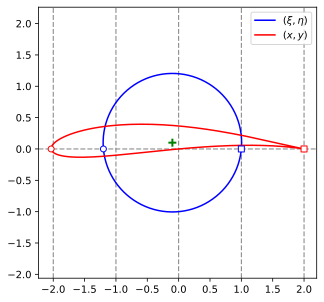

In [65]:
Δr = -0.1
Δi =  0.1

a = sqrt( (1.0-Δr)**2 + Δi**2 )
c = complex( Δr, Δi )
ζ = a * exp( i*θ ) + c
z = ζ + 1.0 / ζ

draw_grid()

mpl.plot( real(ζ), imag(ζ),'b', label=r'$(\xi,\eta)$')
mpl.plot( real(z), imag(z),'r', label=r'$(x,y)$')

# LE and TE points
ζe = array( ( complex(-1+2*Δr,0), complex(1,0) ) )
ze = ζe + 1.0 / ζe
mpl.plot( real(ζe[0]), imag(ζe[0]),'bo', fillstyle='none', markersize=6, markerfacecolor='w')
mpl.plot( real(ze[0]), imag(ze[0]),'ro', fillstyle='none', markersize=6, markerfacecolor='w')
mpl.plot( real(ζe[1]), imag(ζe[1]),'bs', fillstyle='none', markersize=6, markerfacecolor='w')
mpl.plot( real(ze[1]), imag(ze[1]),'rs', fillstyle='none', markersize=6, markerfacecolor='w')
# circle center
mpl.plot( real(c), imag(c),'g+', markersize=8, markeredgewidth=2)

mpl.legend();

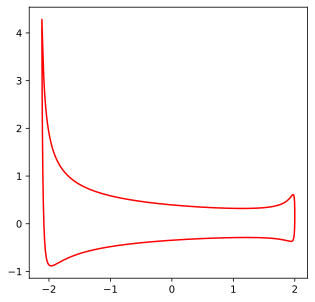

In [67]:
Δr = -0.20
Δi =  0.10

a = sqrt( (1.0-Δr)**2 + Δi**2 )
c = complex( Δr, Δi )
ζ = a * exp( i*θ ) + c
z = ζ + 1.0 / ζ

α = rads( 6.0 )
β = arctan( Δi / (1.0-Δr) )

Wζ = exp( -i*α )*ζ + exp( i*α ) * a**2 / ζ + (2*a)*i*sin( α + β ) * log( ζ )
Wz = Wζ + 1.0 / Wζ

dWζ = exp( -i*α ) - a**2 / ζ**2 * exp( i*α ) + 2*i*sin( α + β ) * a / ζ
dfζ = 1.0 - a**2 / ζ**2

Uz = dWζ / dfζ
Cp = 1.0 - abs( Uz )**2


mpl.plot( real(z), -Cp,'r', label=r'$(x,y)$')